In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, circuit_drawer,plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
from qiskit.circuit.library import CU1Gate
import numpy as np

In [3]:
#Figure 1 et 2
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte NOT (X) sur le premier qubit
circuit.x(0)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename="not.png")

# Exécution du circuit sur un simulateur quantique
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

# Visualisation de la sphère d'état des deux qubits
plot_bloch_multivector(statevector).savefig("not_sphere.png")


In [9]:
#Figure 3,4,5
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte Hadamard sur le premier qubit
circuit.h(0)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='h.png')
# Exécution du circuit sur un simulateur quantique
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

# Visualisation de la sphère d'état des deux qubits
plot_bloch_multivector(statevector).savefig("hadamard_sphere.png")

# Visualisation de l'histogramme des résultats de mesure
plot_histogram(result.get_counts(circuit),filename="hadamard_histogram.png")



In [10]:
#Figure 6 et 7
#Création du circuit à un qubit
circuit = QuantumCircuit(1)

# Angle de rotation (π/4)
theta = np.pi/4

# Visualisation de la sphère d'état avant l'application de la porte ROTX
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector).savefig("before_rotx.png")

# Application de la porte ROTX(π/4) sur le qubit 0
circuit.rx(theta, 0)

# Visualisation de la sphère d'état après l'application de la porte ROTX
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector).savefig("after_rotx.png")

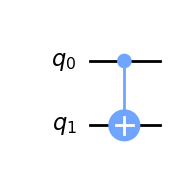

In [11]:
#Figure 8
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte CNOT (CX) avec le premier qubit comme contrôle et le deuxième qubit comme cible
circuit.cx(0, 1)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='cnot.png')


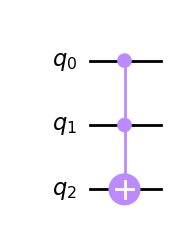

In [12]:
#Figure 9
# Création du circuit à trois qubits
circuit = QuantumCircuit(3)

# Application de la porte Toffoli (CCX) avec les deux premiers qubits comme contrôles et le troisième qubit comme cible
circuit.ccx(0, 1, 2)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='toffoli.png')

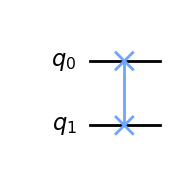

In [13]:
#Figure 10
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte Swap
circuit.swap(0, 1)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='swap.png')

In [14]:
#Figure 11 et 12
state = "000"

mycircuit = QuantumCircuit(len(state))
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits[::-1])

#print(f"Base de calcul |{state}>")
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data).savefig('calcul_base.png'))

#print(f"Base de Fourier |{state}>")
mycircuit.append(QFT(len(state), do_swaps=False), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data).savefig('fourier_base.png'))


None

None

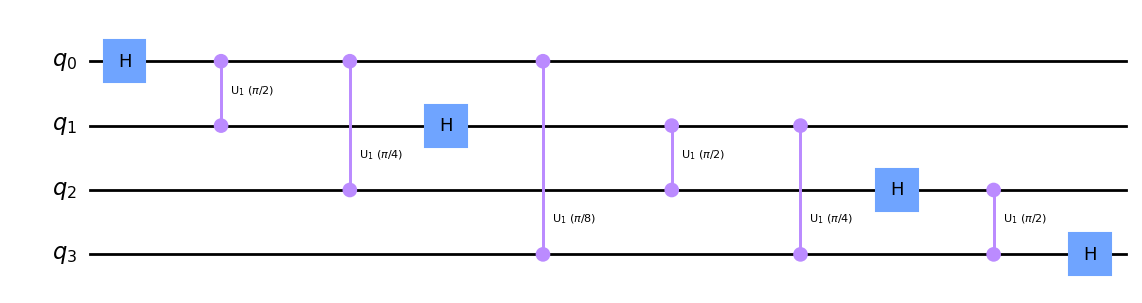

In [6]:
#Figure 13
# Fonction pour générer le circuit QFT pour n qubits
def myQFT(nqbits) :
    
    myQFT_circuit = QuantumCircuit(nqbits)


    for i in range(nqbits):
        myQFT_circuit.h(i)
        for j in range(i + 1, nqbits):
            myQFT_circuit.append(CU1Gate(np.pi / (2**(j-i))), [j, i])
    
    return myQFT_circuit

circuit_drawer(myQFT(4), output='mpl', filename="qft.png")

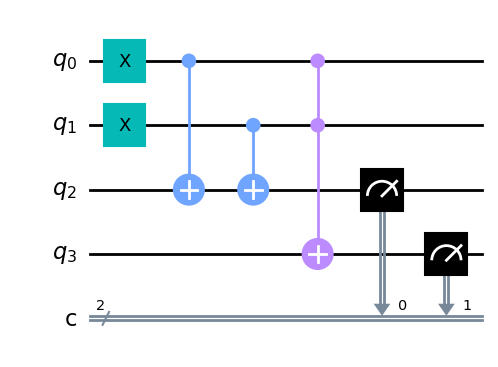

In [4]:
#Figure 14
# Création d'un circuit quantique à 4 qubits
qc = QuantumCircuit(4, 2)

# Préparation des nombres à additionner
qc.x(0)  # Premier nombre = 1 (représenté par le qubit 0)
qc.x(1)  # Deuxième nombre = 1 (représenté par le qubit 1)

# Addition classique
qc.cx(0, 2)  # Ajoute le qubit 0 au qubit de sortie 2
qc.cx(1, 2)  # Ajoute le qubit 1 au qubit de sortie 2
qc.ccx(0,1,3) #controle de la retenue 
# Copie du résultat sur les qubits de mesure
qc.measure(2, 0)  # Mesure le qubit de sortie et le copie sur le bit classique 0
qc.measure(3, 1)  # Mesure le qubit de retenue (3) et le copie sur le bit classique 1
qc.draw(output='mpl',filename="un+un.png")

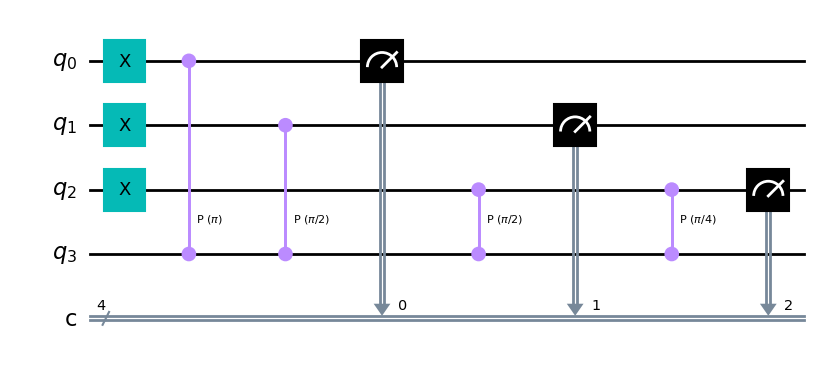

In [16]:
#Figure 15
#qft adder 
# Définition des nombres à additionner
number1 = [0, 1, 0]  # Exemple: 2 en binaire
number2 = [1, 0, 1]  # Exemple: 5 en binaire

# Création du circuit quantique
n = len(number1)
qc = QuantumCircuit(n + 1, n + 1)  # Modification de la taille du circuit

# Préparation des états des nombres à additionner
for i, bit in enumerate(number1):
    if bit:
        qc.x(n - 1 - i)  # Inversion de l'ordre des qubits

for i, bit in enumerate(number2):
    if bit:
        qc.x(n - 1 - i)  # Inversion de l'ordre des qubits

# Application du circuit QFT adder
for i in range(n):
    for j in range(min(2 ** i, n - i)):
        if i + j != n:  # Vérification pour éviter la duplication des qubits
            qc.cp(2 * np.pi / (2 ** (i + 1)), i + j, n)

# Mesure des qubits pour obtenir le résultat
qc.measure(range(n), range(n))
circuit_drawer(qc, output='mpl',filename="qft_Add.png")

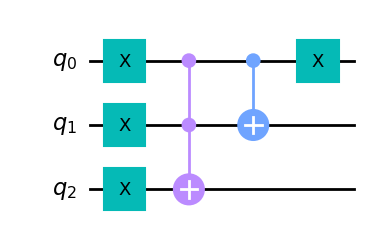

In [6]:
#Figure 17
# Initialisation du circuit quantique avec 4 qubits
qc = QuantumCircuit(3)

# Initialisation des trois premiers qubits à l'état |0>
qc.x(0)
qc.x(1)
qc.x(2)

# Réalisation du complément à deux
qc.ccx(0, 1, 2)
qc.cx(0, 1)
qc.x(0)

circuit_drawer(qc, output='mpl',filename="neg.png")
